In [1]:
# Import Library
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, AveragePooling2D, BatchNormalization, Dropout 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19
from tensorflow.keras.callbacks import EarlyStopping  

In [4]:
train_set = tf.keras.utils.image_dataset_from_directory(
    'tomato/train',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

train_set = train_set.map(lambda x, y: (x / 255.0, y))

val_set = tf.keras.preprocessing.image_dataset_from_directory(
    'tomato/val',
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

val_set = val_set.map(lambda x, y: (x / 255.0, y))

Found 10000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


In [5]:
# Membuat model
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)
conv_base.trainable = False

model = Sequential()

model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))

# Output layer
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [6]:
# Train model
history = model.fit(train_set, 
                    epochs=100, 
                    validation_data=val_set, 
                    callbacks=[EarlyStopping(patience=0)])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1035s 3s/step - accuracy: 0.3676 - loss: 1.8783 - val_accuracy: 0.7460 - val_loss: 0.9301
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 928s 3s/step - accuracy: 0.7535 - loss: 0.7892 - val_accuracy: 0.8350 - val_loss: 0.5209
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 953s 3s/step - accuracy: 0.8337 - loss: 0.5317 - val_accuracy: 0.8660 - val_loss: 0.3923
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 930s 3s/step - accuracy: 0.8695 - loss: 0.4144 - val_accuracy: 0.8880 - val_loss: 0.3248
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 925s 3s/step - accuracy: 0.8900 - loss: 0.3402 - val_accuracy: 0.8990 - val_loss: 0.2803
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 926s 3s/step - accuracy: 0.9108 - loss: 0.2793 - val_accuracy: 0.9180 - val_loss: 0.2470
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 935s 3s/step - accuracy: 0.9256 - loss: 0.2438 - val_accuracy: 0.9260 - val_loss: 0.2249
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 938s 3s/step - accuracy: 0.9309 - loss: 0.2207 -

In [10]:
# Menampilkan accuracy
loss, accuracy = model.evaluate(val_set)
print(f'Validation Accuracy: {accuracy*100:.2f}%')

32/32 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.9477 - loss: 0.1602
Validation Accuracy: 94.90%


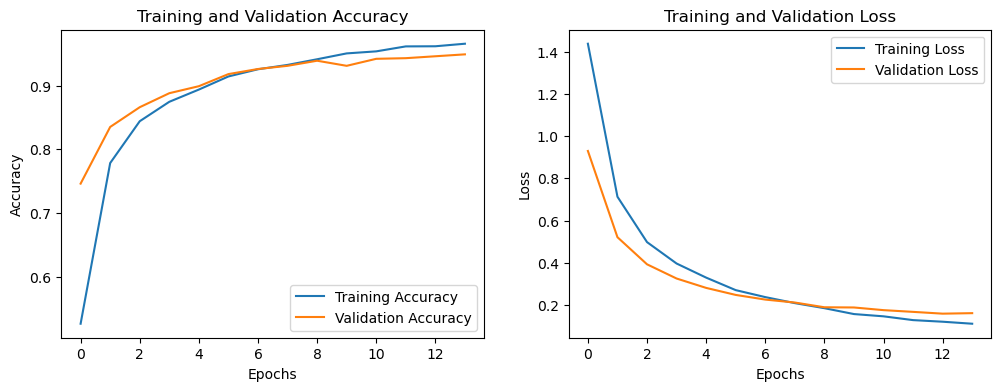

In [11]:
# Plotting accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
# Menyimpan model yang sudah di train
model.save('tomato_classification_model.h5')
model.save('tomato_classification_model.keras')